# import libraries

In [5]:
# %%capture
# !pip install tqdm
# !pip install pytse-client
# !pip install Khayyam

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from datetime import datetime, timedelta

In [4]:
from scipy import stats

In [29]:
import statsmodels.formula.api as smf

In [2]:
import pytse_client as tse

In [6]:
from tqdm import tqdm

In [48]:
from khayyam import *

c:\users\lenovo g5080\appdata\local\programs\python\python39\lib\site-packages\khayyam\algorithms.py:18: UserWarning: The C extension is not available. Switching to fallback python pure algorithms,so it's about 1000X slower than C implementation of the algorithms.
  warnings.warn(


# Index data

In [7]:
index = pd.read_csv("IRX6XTPI0009.csv",encoding='UTF-16 LE', parse_dates=True, index_col='<DTYYYYMMDD>')
del index['<TICKER>']
index.columns = ['index']
# Calculate return
index['index_return'] = index['index'].pct_change()

## calculate six lags for index

In [8]:
for i in range(1,7):
    column_name = 'index_return_t_'+str(i)
    index[column_name] = index['index_return'].shift(i)

In [9]:
index.tail()

,index,index_return,index_return_t_1,index_return_t_2,index_return_t_3,index_return_t_4,index_return_t_5,index_return_t_6
<DTYYYYMMDD>,,,,,,,,
2021-07-28,1316516.4,0.001188,-0.006376,0.009238,0.006417,-0.006333,0.004389,0.001204
2021-07-31,1351467.5,0.026548,0.001188,-0.006376,0.009238,0.006417,-0.006333,0.004389
2021-08-01,1360281.2,0.006522,0.026548,0.001188,-0.006376,0.009238,0.006417,-0.006333
2021-08-02,1357969.2,-0.001700,0.006522,0.026548,0.001188,-0.006376,0.009238,0.006417
2021-08-03,1375612.5,0.012992,-0.001700,0.006522,0.026548,0.001188,-0.006376,0.009238


In [10]:
# list of all dates
dates = index.index

# Fuction for getting stocks data and make dataframe

In [11]:
def get_data(ticker_name = "وبملت", start_date = "2018-03-25"):
    """
    return: df:dataframe
        columns:
            adjClose
            return
            historic volatility
    """
    ticker = tse.Ticker(ticker_name)
    df = ticker.history[['date','adjClose']] #get history
    # Set datetime index
    df = df.set_index(pd.to_datetime(df['date']))
    del df['date']
    # Compute daily return
    df['return'] = df['adjClose'].pct_change()
    # Compute historic volatility
    df['historic_volatility'] = df['return'].rolling(5).std()
    df =df.loc[start_date:]
    return df

# get a list of all stocks' name

In [12]:
import requests

In [13]:
r = requests.get('https://data.nadpco.com/v1/BaseInfo/Companies')

In [14]:
companies = pd.DataFrame(r.json())
# companies.head()

In [15]:
# make a list of MarketName == 'بورس'
tickers_list = list(companies[companies['MarketName'] == 'بورس']['CoTSESymbol'])

In [16]:
# change arabic alphabets
tickers_list = [x.replace('ک', 'ك') for x in tickers_list]
tickers_list = [x.replace('ی', 'ي') for x in tickers_list]

# Calculate EMSI for each day

In [18]:
# get data for all stocks

tickers_data = []

for ticker in tqdm(tickers_list):
    try:
        tickers_data.append(get_data(ticker))
    except:
#         print('An error for getting data for:', ticker)
        continue

 44%|███████████████████████████████████▎                                            | 175/396 [03:35<03:02,  1.21it/s]

An error for getting data for: آكنتور


 60%|███████████████████████████████████████████████▋                                | 236/396 [05:31<18:38,  6.99s/it]

An error for getting data for: مداران


 68%|██████████████████████████████████████████████████████▏                         | 268/396 [06:13<01:49,  1.17it/s]

An error for getting data for: سابيك


 71%|████████████████████████████████████████████████████████▌                       | 280/396 [06:26<02:32,  1.32s/it]

An error for getting data for: وانصار


 73%|██████████████████████████████████████████████████████████▍                     | 289/396 [06:38<03:31,  1.97s/it]

An error for getting data for: شجي


 74%|███████████████████████████████████████████████████████████▌                    | 295/396 [06:42<01:33,  1.08it/s]

An error for getting data for: ولكار


 75%|████████████████████████████████████████████████████████████                    | 297/396 [06:42<00:56,  1.75it/s]

An error for getting data for: ولنوين


 80%|███████████████████████████████████████████████████████████████▋                | 315/396 [06:54<00:29,  2.76it/s]

An error for getting data for: وسقزوين
An error for getting data for: پرشيا


 80%|████████████████████████████████████████████████████████████████▏               | 318/396 [06:54<00:16,  4.87it/s]

An error for getting data for: وسمحال


 81%|████████████████████████████████████████████████████████████████▋               | 320/396 [06:55<00:18,  4.07it/s]

An error for getting data for: وسهرمز


 83%|██████████████████████████████████████████████████████████████████▋             | 330/396 [07:00<00:35,  1.85it/s]

An error for getting data for: وستهران


 84%|███████████████████████████████████████████████████████████████████             | 332/396 [07:01<00:23,  2.72it/s]

An error for getting data for: سينا


 85%|███████████████████████████████████████████████████████████████████▉            | 336/396 [07:06<00:51,  1.17it/s]

An error for getting data for: وسمنان


 88%|██████████████████████████████████████████████████████████████████████▋         | 350/396 [07:22<01:12,  1.58s/it]

An error for getting data for: مدار
An error for getting data for: ثملي


 91%|████████████████████████████████████████████████████████████████████████▋       | 360/396 [07:24<00:09,  3.90it/s]

An error for getting data for: اروند
An error for getting data for: برانسفو


 93%|██████████████████████████████████████████████████████████████████████████▏     | 367/396 [07:29<00:22,  1.29it/s]

An error for getting data for: ومعين


 94%|███████████████████████████████████████████████████████████████████████████▏    | 372/396 [07:34<00:22,  1.05it/s]

An error for getting data for: اپال
An error for getting data for: انرژي


 95%|████████████████████████████████████████████████████████████████████████████▏   | 377/396 [07:39<00:16,  1.16it/s]

An error for getting data for: ومدير


 96%|████████████████████████████████████████████████████████████████████████████▊   | 380/396 [07:39<00:08,  1.98it/s]

An error for getting data for: تمدن
An error for getting data for: آسياتك


100%|████████████████████████████████████████████████████████████████████████████████| 396/396 [07:43<00:00,  1.17s/it]

An error for getting data for: غكورش
An error for getting data for: سپيد
An error for getting data for: اجداد
An error for getting data for: كيمياتك
An error for getting data for: اردستان
An error for getting data for: فسبزوار


In [123]:
EMSI = pd.DataFrame()
for date in dates:
    returns = []
    historic_volatilities = []
    for i in range(len(tickers_data)):
        try:
            returns.append(tickers_data[i].loc[date,'return'])
            historic_volatilities.append(tickers_data[i].loc[date,'historic_volatility'])
        except:
            continue
    # calculate Spearman rank correlation
    emsi = 100 * stats.spearmanr(returns, historic_volatilities, nan_policy = 'omit').correlation
    EMSI.loc[date, 'EMSI'] = emsi

## calculate five lags for EMSI

In [125]:
for i in range(1,6):
    column_name = 'EMSI_t_'+str(i)
    EMSI[column_name] = EMSI['EMSI'].shift(i)

In [126]:
EMSI

,EMSI,EMSI_t_1,EMSI_t_2,EMSI_t_3,EMSI_t_4,EMSI_t_5
2018-03-25,4.086467,NaN,NaN,NaN,NaN,NaN
2018-03-26,-13.369033,4.086467,NaN,NaN,NaN,NaN
2018-03-27,-19.393749,-13.369033,4.086467,NaN,NaN,NaN
2018-03-28,6.531241,-19.393749,-13.369033,4.086467,NaN,NaN
2018-04-03,3.494083,6.531241,-19.393749,-13.369033,4.086467,NaN
...,...,...,...,...,...,...
2021-07-28,8.990273,-35.023972,0.181851,17.019668,-20.488508,-16.660694
2021-07-31,27.042136,8.990273,-35.023972,0.181851,17.019668,-20.488508
2021-08-01,11.127179,27.042136,8.990273,-35.023972,0.181851,17.019668
2021-08-02,1.729561,11.127179,27.042136,8.990273,-35.023972,0.181851


# Plot EMSI

In [127]:
# time span
start = '2019-03-25'
end = '2020-03-19'
time_delta = 14

In [128]:
# time ticks for plot
gregorian_dates = []
jalali_dates = []
t = datetime.strptime(start, '%Y-%m-%d')
while t < datetime.strptime(end, '%Y-%m-%d'):
    gregorian_dates.append(t)
    jalali_dates.append(JalaliDate(t).strftime('%Y-%m-%d'))
    t = t + timedelta(time_delta)

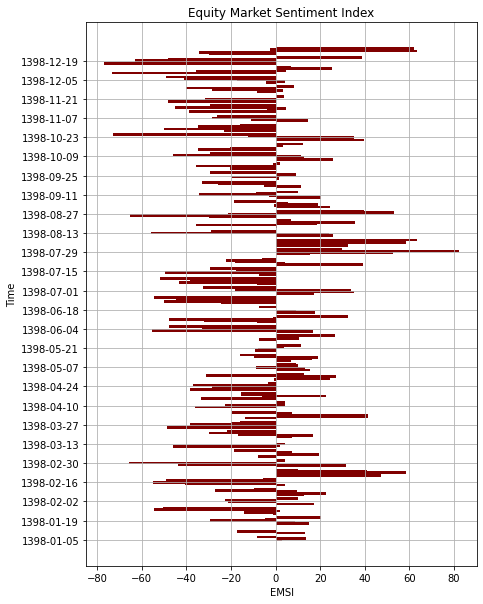

In [129]:
# Figure Size
fig, ax = plt.subplots(figsize =(7, 10))

plt.xlabel('EMSI')
plt.ylabel('Time')
plt.title('Equity Market Sentiment Index')

# Horizontal Bar Plot
plt.barh(EMSI.loc[start:end].index,  EMSI.loc[start:end,'EMSI'], color ='maroon', height=2)

# Set text labels
plt.yticks(gregorian_dates, jalali_dates) 

plt.grid()

# Concat EMSI and Index data

In [130]:
## start and end date:
start = '2019-03-25'
end = '2020-03-19'

In [131]:
# Concat two dataframe
final = pd.concat([index.loc[start:end], EMSI.loc[start:end]], axis=1, join="inner")
# final.columns = ['EMSI', 'index', 'index_return']
final

,index,index_return,index_return_t_1,index_return_t_2,index_return_t_3,index_return_t_4,index_return_t_5,index_return_t_6,EMSI,EMSI_t_1,EMSI_t_2,EMSI_t_3,EMSI_t_4,EMSI_t_5
2019-03-25,179194.3,0.002996,0.015692,0.019569,0.008168,0.011882,0.007181,0.003217,2.778055,5.295179,14.159302,2.344073,0.346996,-0.334660
2019-03-26,179766.3,0.003192,0.002996,0.015692,0.019569,0.008168,0.011882,0.007181,13.474512,2.778055,5.295179,14.159302,2.344073,0.346996
2019-03-27,181542.4,0.009880,0.003192,0.002996,0.015692,0.019569,0.008168,0.011882,-8.174656,13.474512,2.778055,5.295179,14.159302,2.344073
2019-03-30,185358.0,0.021018,0.009880,0.003192,0.002996,0.015692,0.019569,0.008168,13.389566,-8.174656,13.474512,2.778055,5.295179,14.159302
2019-03-31,185281.4,-0.000413,0.021018,0.009880,0.003192,0.002996,0.015692,0.019569,-17.167348,13.389566,-8.174656,13.474512,2.778055,5.295179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-14,502738.9,-0.033587,0.000700,-0.027195,-0.026961,-0.010774,0.020084,0.028164,-29.824675,38.957384,-48.274189,-63.043209,-76.869024,6.990642
2020-03-15,494405.6,-0.016576,-0.033587,0.000700,-0.027195,-0.026961,-0.010774,0.020084,-34.172589,-29.824675,38.957384,-48.274189,-63.043209,-76.869024
2020-03-16,506079.3,0.023612,-0.016576,-0.033587,0.000700,-0.027195,-0.026961,-0.010774,63.489466,-34.172589,-29.824675,38.957384,-48.274189,-63.043209
2020-03-17,502425.9,-0.007219,0.023612,-0.016576,-0.033587,0.000700,-0.027195,-0.026961,-2.515866,63.489466,-34.172589,-29.824675,38.957384,-48.274189


# Risk categorisation of daily EMSI

In [132]:
high_risk_a = (final['EMSI'] <= -30).sum()
mod_risk_a = ((final['EMSI'] > -30) & (final['EMSI'] <= -10)).sum()
risk_n =     ((final['EMSI'] > -10) & (final['EMSI'] <= 10)).sum()
mod_risk_s = ((final['EMSI'] > 10) & (final['EMSI'] < 30)).sum()
high_risk_s =(final['EMSI'] >= 30).sum()

In [133]:
risk_categories = pd.DataFrame({
    "Range of EMSI" : ['−30 and below', '−10 to −30', '-10 to +10', '+10 to +30', '+30 and above'],
    "Category" : ['Highly risk averse', 'Moderately risk averse', 'Risk neutral', 'Moderately risk seeking', 'Highly risk seeking'],
    "Number of days" : [high_risk_a, mod_risk_a, risk_n, mod_risk_s, high_risk_s]
})

In [134]:
risk_categories

,Range of EMSI,Category,Number of days
0,−30 and below,Highly risk averse,53
1,−10 to −30,Moderately risk averse,52
2,-10 to +10,Risk neutral,69
3,+10 to +30,Moderately risk seeking,41
4,+30 and above,Highly risk seeking,23


# Run regression

## First Equation:

In [137]:
mod1 = smf.ols(formula='index_return ~ index_return_t_1 + EMSI ', data=final).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:           index_return   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     43.94
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           6.12e-17
Time:                        11:40:28   Log-Likelihood:                 721.14
No. Observations:                 238   AIC:                            -1436.
Df Residuals:                     235   BIC:                            -1426.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0051      0.001  

## Second Equation:

In [138]:
mod2 = smf.ols(formula='index_return ~ index_return_t_1 + index_return_t_2 + index_return_t_3 + index_return_t_4 + index_return_t_5 + index_return_t_6 + EMSI + EMSI_t_1 + EMSI_t_2 + EMSI_t_3 + EMSI_t_4 + EMSI_t_5',
              data=final).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:           index_return   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     15.53
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           1.16e-23
Time:                        11:40:28   Log-Likelihood:                 755.12
No. Observations:                 238   AIC:                            -1484.
Df Residuals:                     225   BIC:                            -1439.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0022      0.001  